# <center> Text Classification

#### Table of Contents

 1. Introduction
 
     1.1 The Problem 
 
     1.2 Objectives
 
     1.3 Dataset
     
     1.4 Evaluation Methodology
     
     
 2. Implementation
 
     2.1 Importing Dataset
     
     2.2 Data Cleaning

     2.3 Data Exploration

     2.4 Pre-processing
 
     2.5 Baseline
 
     2.6 Classification Methodology 
     
   
 3. Conclusions
 
     3.1 Evaluation
     
     3.2 Summary

4. References

## 1 Introduction

### 1.1 Problem 

Twitter is one of the largest social media and social networking platforms founded 16 years and it has a huge social effect on our modern day life still to this day from politics, culture to sports. Tweets are specifically interesting and easier to analyze than other social media platform messages because they are limited to 280 characters. [1] Sentiment analysis an essential field of natural language processing. Sentiment analysis tools are used to identify and extract opinion from texts, identify polarities, emotional states, differentiate subjective from objective information in an automated fashion. 

In this project, I will be working on sentiment analysis of tweets from twitter. A twitter sentiment analysis would help us easily determine the emotional tone and opinion of the user behind the tweet. Due to tweets' limited and short length it makes it easier to analyze it. Sentiment analysis on tweet posts will help companies to understand the sentiment of their users on their products, politicians to poll public opinion, detects issues with certain products, and more. Only recently, we are able to analyze public sentiment so quickly and in an automatic process. It used to be an extremely difficult task to do with surveys and questionnaires. However, thanks to machine learning model this process can be done within minutes. 


### 1.2 Objectives

I would like to analyze the dataset, explore interesting points about the features of the dataset and later implement a natural language processing model to predict future tweets. I would like to compare my results to a notebook I found on Kaggle's official website from Kate Arbuzova. She created multiple models using logistic regression, textblob, and neutral network using Pytorch Lightening. [2]

At first I will be exploring the dataset using word clouds just to get a sense of the general sentiment behind the dataset. Later I will explore it using multiple bar charts. I'll compare the number of each sentiment found in the tweet database and then compare the sentiment of each entity mentioned in the tweet posts. 

After this step, I will start the pre-processing step. To do this, I got some inspiration from the mentioned notebook earlier from Kate Arbuzova as well however added my own preprocessing functions and removed a few of hers. I wanted to see given similar datasets how will our language model will differ from each other. 
The natural language processing model that I have decided to work with is Random Forest Classifier from sklearn library. At the end, I also will try a simple Logistic Regression model from the same library as well to see if it improves the results or creates no difference. Finally, I will create a confusion matrix and compare the performances of each machine learning model to the previously published results. 

### 1.3 Dataset

I found this dataset on official Kaggle website uploaded by user Passionate-NLP. It is licensed to be used by the public. [3] According to the Kaggle web page, the collection methodology used was "Automated collection and manual filtering & labeling". Since the author is unclear the exact method used by the dataset author, it will make this dataset less trustworthy. The dataset included to two large tables initially: twitter_training and twitter_validation. However, for the purposes of this project and the machine learning model I was using, I realized I can use the twitter_training easily as training data and testing data to create the natural language processing model. 

As you will see below, the twitter_traning is an extremely large dataset (10 MB) originally consisting of 74681 rows or entries and 4 columns or features. At first glance, I noticed that the columns don't have labels and I manually add proper labels for them. The features are 'tweetID', 'entity', 'sentiment', and 'tweetContent'. 'tweetID' is a unique ID associated to each tweet, it will help to detect duplicate rows. 'entity' refers to the main subject the tweet talks about. It can be a name of a company or a product. 'sentiment' is manually added sentiment from of the four : positive, negative, neutral, irrelevant. Finally 'tweetContent' is the content and text that we will create the natural language processing model based on. 

'tweetID' is an integer type, and  'entity', 'sentiment', and 'tweetContent' are all string types however they show as object format in data frame in pandas. I explore and analyze the dataset in detail later in this notebook. 

### 1.4 Evaluation Methodology

I decided to use Random Forest Classification model that I learned about in Machine Learning course and wanted to implement it in different context. Random forests multiple decision trees on the training dataset. I used the predefined function from the sklearn library with only ten trees to create the model. If I had set it to any higher value, the processing time would be too much and not efficient. Random Forest should work will in this case, since it is a solid machine learning classification model, it is perfect for continuos values, non-linear trends, that do not depend of time series and it uses averaging to improve the accuracy. I will be mostly focusing on comparing the accuracy to other models created. [4]

Before feeding the model through this classification, I used in-depth preprocessing steps to create the proper training and test datasets. To do so, I removed symbols, urls, double space, punctuations, stop word, and numbers. Finally, inspired by Abuzoba's notebook, I also decoded the emojis. After the dataset was preprocessed, I created an stemmed_train_data to reduce the text to the stems and be able to analyze the sentiment behind the text more efficiently. After that I used the TfidfVectorizer from sklearn.feature_extraction.text to convert the text to matrix of term-frequency times inverse document frequency. It allowed me to scale down the effect overly frequent words in a document. [5]

Later, I decided to use a simple Logistic Regression as well, to compare confusion matrices. 
The evaluation methods I will use is through sklearn library classification reports that include precision, recall, f1-score, support, accuracy, macro average, and weighted average. However, I will be focusing on the accuracy in this case to compare it the baseline. 

## 2 Implementation

### 2.1 Importing Dataset

Importing libraries and the data file from a csv file downloaded directly from kaggle official website. I immediately noticed that the was no column header for the csv files unlike what was shown on the kaggle website so I quickly added that manually to the csv files to easily navigate through them. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

In [2]:
train_data = pd.read_csv('./twitter_training.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


### 2.2 Data Cleaning

I noticed that there are no column headers on the dataset unlike what it shows, I'll be adding them to be bale to read the dataset easily and later will be checking for duplicates and null rows in the dataset.

In [4]:
train_data.columns=['tweetID','entity','sentiment','tweetContent']

In [5]:
train_data.head()

,tweetID,entity,sentiment,tweetContent
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tweetID       74681 non-null  int64 
 1   entity        74681 non-null  object
 2   sentiment     74681 non-null  object
 3   tweetContent  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


The code below shows  that there are 2701 rows with duplicate entries in train_data dataset. We will be dropping these. 

In [7]:
train_data[train_data.duplicated()]

,tweetID,entity,sentiment,tweetContent
19,2404,Borderlands,Positive,that was the first borderlands session in a lo...
25,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
50,2409,Borderlands,Neutral,Blaming Sight for Tardiness! A little bit of b...
63,2411,Borderlands,Neutral,.. [
145,2425,Borderlands,Negative,"""What a bitch!"""
...,...,...,...,...
74504,9171,Nvidia,Neutral,This benchmarking comparison between Oculus Qu...
74509,9172,Nvidia,Positive,@ NVIDIAGeForce @ nvidia
74588,9185,Nvidia,Neutral,Heard people are having issues with ordering t...
74618,9190,Nvidia,Positive,This news about the Nvidia 3000 series is ligi...


In [8]:
train_data = train_data.drop_duplicates()

In [9]:
train_data.shape

(71980, 4)

Using sns heatmap function, I am checking for null data below. It seems like all the null data are in Tweet Content column.

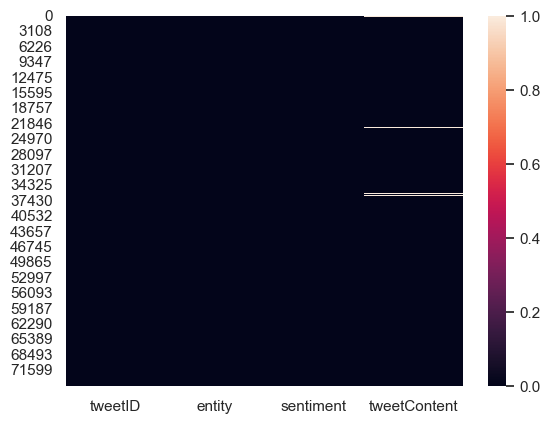

In [10]:
ax = sns.heatmap(train_data.isnull())

In [11]:
train_data = train_data.dropna()

In [12]:
train_data.shape

(71654, 4)

### 2.3 Data Exploration

In [13]:
import nltk
from wordcloud import WordCloud

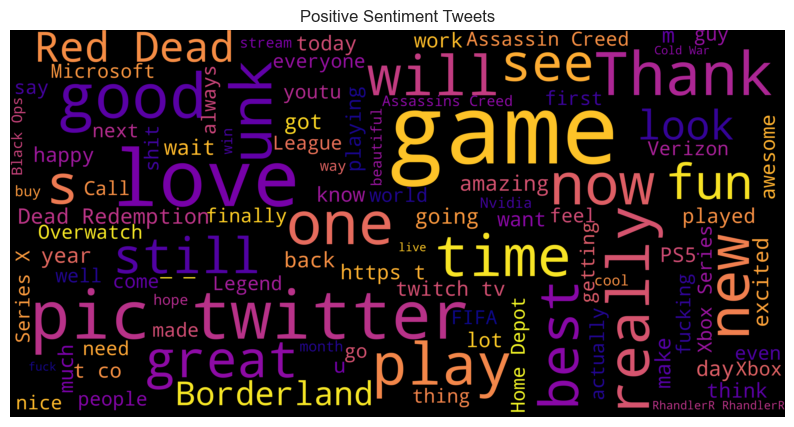

In [14]:
word_cloud_tweets = ''.join(train_data[train_data["sentiment"]=="Positive"].tweetContent)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    scale=10,
    width=800,
    height=400,
    colormap = 'plasma'
).generate(word_cloud_tweets)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Sentiment Tweets")
plt.show()

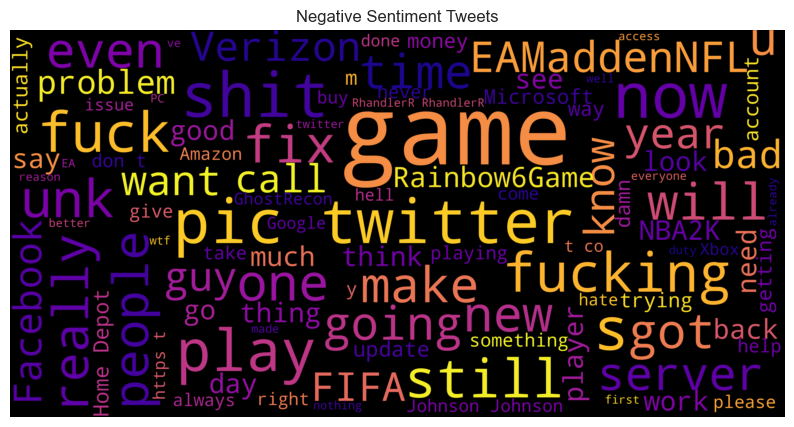

In [15]:
word_cloud_tweets = ''.join(train_data[train_data["sentiment"]=="Negative"].tweetContent)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    scale=10,
    width=800,
    height=400,
    colormap = 'plasma'
).generate(word_cloud_tweets)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Sentiment Tweets")
plt.show()

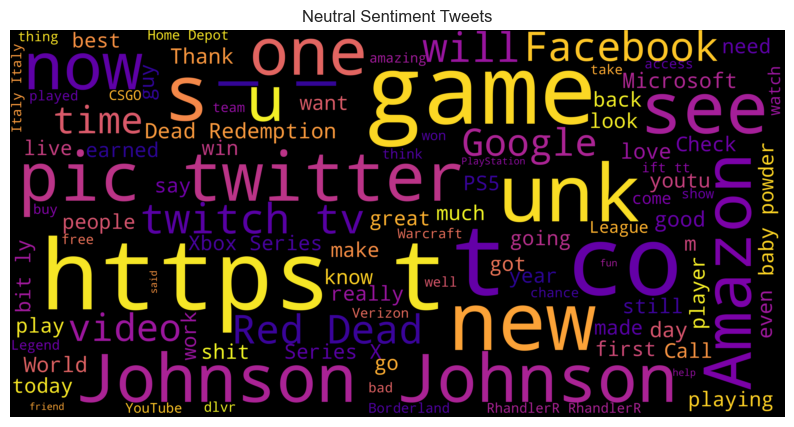

In [16]:
word_cloud_tweets = ''.join(train_data[train_data["sentiment"]=="Neutral"].tweetContent)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    scale=10,
    width=800,
    height=400,
    colormap = 'plasma'
).generate(word_cloud_tweets)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Neutral Sentiment Tweets")
plt.show()

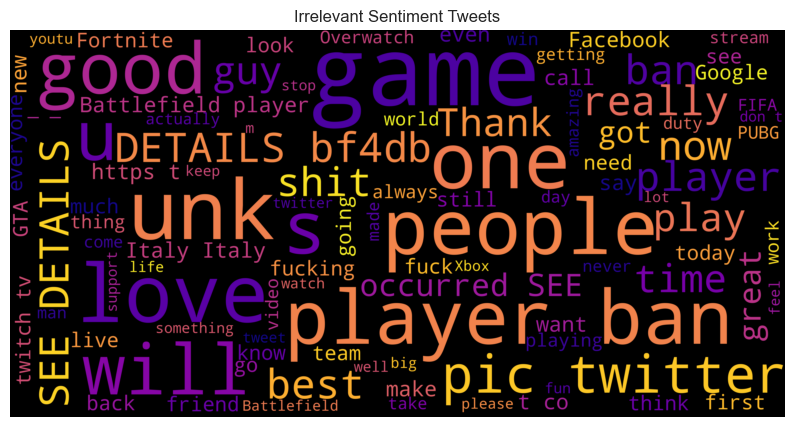

In [17]:
word_cloud_tweets = ''.join(train_data[train_data["sentiment"]=="Irrelevant"].tweetContent)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    scale=10,
    width=800,
    height=400,
    colormap = 'plasma'
).generate(word_cloud_tweets)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Irrelevant Sentiment Tweets")
plt.show()

<AxesSubplot: xlabel='sentiment', ylabel='count'>

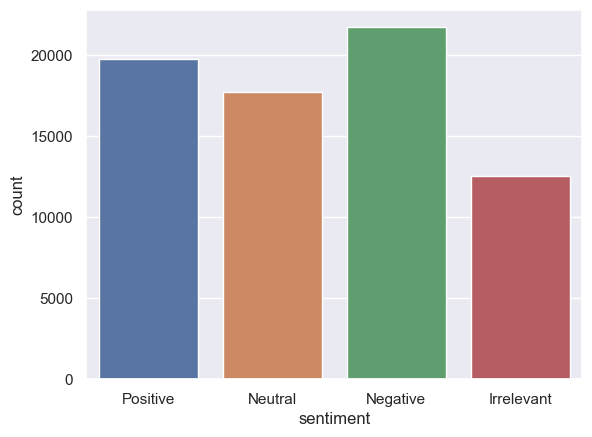

In [18]:
sns.countplot(x=train_data['sentiment'])

<AxesSubplot: xlabel='entity'>

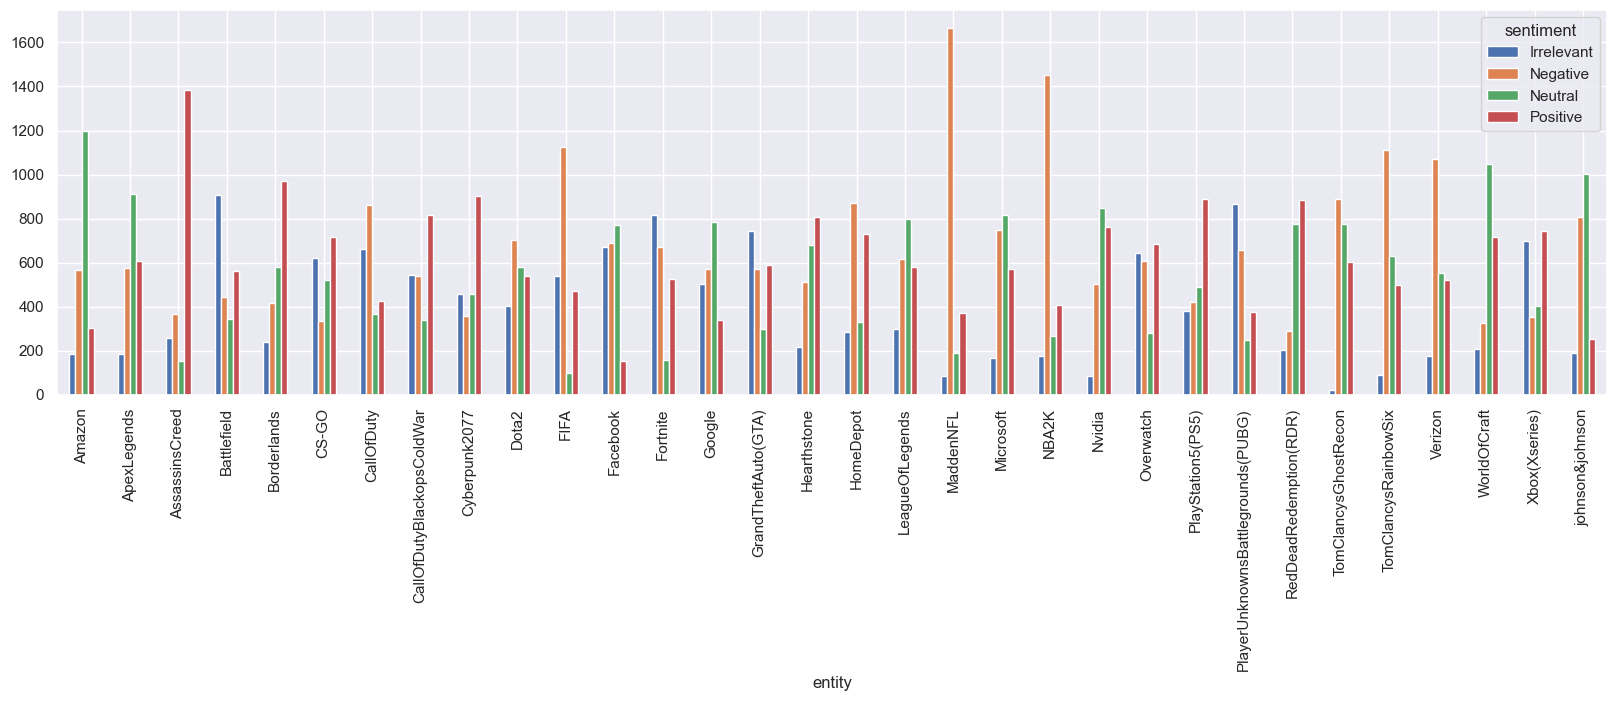

In [19]:
# Sentiment Analysis based on Entity Bar Chart
tweet_sentiment = train_data.groupby(['entity', 'sentiment']).sentiment.count().unstack()
tweet_sentiment.plot(kind='bar',figsize=(20,5))

### 2.4 Pre-processing

In [20]:
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from tqdm import tqdm
import emoji
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Taraneh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


We do the following to create the y value for the machine learning model by assigning a value between 0 and n to the four sentiment values of 'positive' and 'negative', 'neutral' and 'irrelevant'.

In [21]:
from sklearn import preprocessing

train_texts = train_data["tweetContent"]

#encodes the target labels between 0 and n-classes
lb = preprocessing.LabelEncoder()
train_data['sentiment']=lb.fit_transform(train_data['sentiment'])
y = train_data['sentiment']

I wil be removing symbols, urls, double space, punctuation, stop word, and numbers and decode emojis to create a proper text dataset for the machine learning model to process easily. None of these add any more meaning to the text and removing them will only simplify the text to be processed and modeled upon. Also I will change all the text to lower case as well. This will create the proper training and test dataset. 

In [22]:
#inspired by Arbuzoba's work
# remove symbols
def remove_symbols(texts):
    print('Removing remove symbols...')
    pattern = re.compile("(@)") 
    return [re.sub(pattern, '', text) for text in texts]

# remove urls
def remove_urls( texts):
    print('Removing URLs...')
    pattern = re.compile('(\w+\.com ?/ ?.+)|(http\S+)')
    return [re.sub(pattern, '', text) for text in texts]

# remove double space   
def remove_double_space(texts):
    print('Removing double space...')
    pattern = re.compile(' +')
    return [re.sub(pattern, ' ', text) for text in texts]

# remove punctuation 
def remove_punctuation(texts):
    print('Removing Punctuation...')
    pattern = re.compile('[^a-z ]')
    return [re.sub(pattern, ' ', text) for text in texts]

# remove stopwords
def remove_stopwords(texts):
    print('Removing stopwords...')
    return [[w for w in text.split(' ') if w not in stopwords] for text in tqdm(texts)]

# remove numbers  
def remove_numbers(texts):
    print('Removing numbers...')
    return [' '.join([w for w in text if not w.isdigit()]) for text in tqdm(texts)]


# decode emojis
def decode_emojis(texts):
    print('Decoding emojis...')
    return [emoji.demojize(text, language='en') for text in texts] 

def pre_process(texts):
    
    X = [text.lower() for text in texts]  # lower
    X = remove_symbols(X)                      # remove symbols
    X = remove_urls(X)                         # remove urls
    X = remove_double_space(X)                 # remove double space
    X = remove_punctuation(X)                  # remove punctuation
    X = remove_stopwords(X)                    # remove stopwords
    X = remove_numbers(X)                      # remove numbers   
    X = decode_emojis(X)                       # decode emojis  
    return X      
    

In [23]:
processed_train_data = pre_process(train_texts)          

Removing remove symbols...
Removing URLs...
Removing double space...
Removing Punctuation...
Removing stopwords...


100%|██████████| 71654/71654 [00:00<00:00, 175894.21it/s]


Removing numbers...


100%|██████████| 71654/71654 [00:00<00:00, 461864.80it/s]


Decoding emojis...


We use the stemmer from nltk library to standardize the text and facilitate the classification of the tweets by analyzing the stems. 

In [24]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

def get_stemmed_text(texts):
    stemmer = PorterStemmer()

    return [' '.join([stemmer.stem(word) for word in text.split()]) for text in texts]

In [25]:
stemmed_train_data = get_stemmed_text(processed_train_data)

Finally, in the last step of the preprocessing, we use TfidfVectorizer to convert the stemmed text, to know the  frequency of each word used, convert the text to a matrix of TF-IDF as described earlier in evaluation methods. 

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(stemmed_train_data)
X = tfidf_vectorizer.transform(stemmed_train_data)

### 2.5 Baseline

As mentioned above, I use Arbuzoba's work published by her on Kaggle as the baseline for this analysis.[3] I will compare my simple logistic regression and forest classifier to her use of logistic regression. You can see below her final results using logistic regression after lengthy preprocessing. Her results were up voted by the community close to forty times which made it a suitable candidate for the baseline in this small project. 

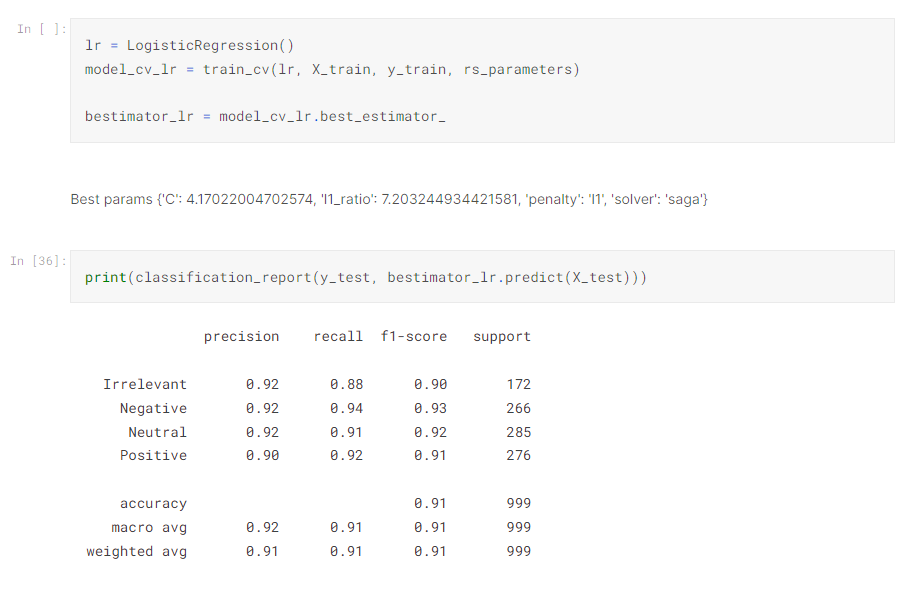

### 2.6 Classification Methodology

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y, train_size = 0.8)

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


text_classifier_randomforest = RandomForestClassifier(n_estimators=10, random_state=0)
text_classifier_randomforest.fit(X_train, y_train)

y_pred=text_classifier_randomforest.predict(X_val)


In [29]:
from sklearn.linear_model import LogisticRegression

text_classifier_reg = LogisticRegression(random_state=0).fit(X, y)

y_pred_reg=text_classifier_reg.predict(X_val)

C:\Users\Taraneh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 3 Conclusions

### 3.1 Evaluation


As you can see below, I have been only able to create models with at most 88% accuracy. It seems like my simple implementation of Logistic Regression and Random Forest Classifier isn't as good as the chosen baseline. This may be due to multiple issues, I perhaps didn't do the preprocessing as well as the baseline document did so. Also, I used very limited number of trees in the Random Forest Classifier since I simply did not have the computational resources to run a longer program. Using only ten trees, allowed the classification algorithm to run in less than minute - 46.6 s to be exact which is impressive for the accuracy value it produced. I will say, I didn't expect much from the simple implementation of Logistic Regression that I did, but it did not completely fail and produced an 82% accuracy results. Here's confusion matrices and the classification reports:

In [30]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      2498
           1       0.90      0.91      0.90      4453
           2       0.84      0.89      0.87      3537
           3       0.88      0.87      0.88      3843

    accuracy                           0.88     14331
   macro avg       0.88      0.88      0.88     14331
weighted avg       0.88      0.88      0.88     14331



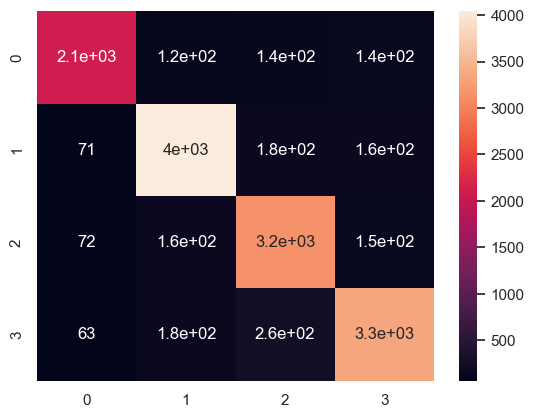

In [31]:
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True)
plt.show()

In [32]:
print(classification_report(y_val,y_pred_reg))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80      2498
           1       0.84      0.86      0.85      4453
           2       0.79      0.81      0.80      3537
           3       0.81      0.83      0.82      3843

    accuracy                           0.82     14331
   macro avg       0.82      0.81      0.82     14331
weighted avg       0.82      0.82      0.82     14331



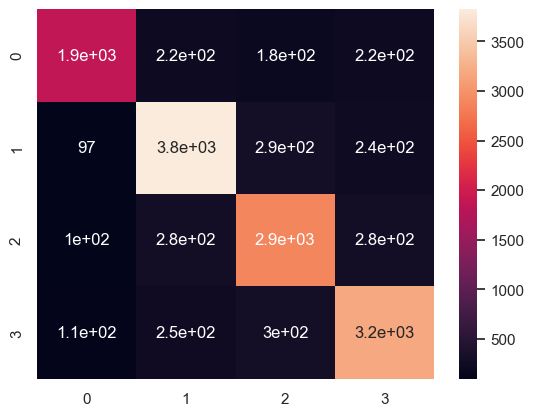

In [33]:
sns.heatmap(confusion_matrix(y_val, y_pred_reg), annot=True)
plt.show()

### 3.2 Summary

Tweet sentiment analysis is a great tool that can be used in multiple industries due to extraordinary impact that social media and social networking platforms such as twitter have on our modern day to day life. Many companies are interested in public opinion analysis. To create a natural language processing model on tweets, I used a large open source dataset from Kaggle that consisted  of more than 75 thousands rows and only four columns with each column representing one of these four sentiments: positive, negative, neutral and irrelevant. The purpose of this language model, is to predict with high accuracy sentiment of a new tweet outside the tweets it was trained on. 

To compare my results, I found a reliable notebook on Kaggle that seemed approved by the community that had achieved 93% accuracy through Logistic Regression. This inspired me to try a simple Logistic Regression algorithm but also look for other better ways to create a proper language model based on this large tweet dataset. I decided on using Random Forest Classifier using only 10 trees since tweets are continuous datasets that there are no non-linear models for.  I used the following preprocessing steps:  removing symbols, urls, double space, punctuation, stop word, and numbers, decode emojis,  stemming, and creating a TF-IDF matrix  to create a proper text dataset for the machine learning model. 

Lastly, I implemented the Random Forest Classifier and Logistic Regression. Using the first classification technique, I was able to get 88% accuracy  and using a simple logistic regression algorithm 82%. These results are easily reproducible using the same preprocessing steps.In future, I will implement different natural language processing models to compare their results and would like to use different pre-processing techniques. 

## 4 References

[1] Wikipedia, https://en.wikipedia.org/wiki/Twitter

[2] Kaggle, https://www.kaggle.com/code/katearb/sentiment-analysis-in-twitter-93-test-acc

[3] Kaggle, https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis

[4] Scikit, https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

[5] Scikit, https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html